In [340]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### load the dataset

In [379]:
df=pd.read_csv("credit_card_default_train.csv")
test=pd.read_csv("credit_card_default_test.csv")
test1=pd.read_csv("credit_card_default_test.csv")

In [380]:
df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


### drop the Client_ID column and select categorical data

In [381]:
df=df.drop('Client_ID',axis=1)
client_id=test['Client_ID']
test=test.drop('Client_ID',axis=1)

labeldata=df.select_dtypes(include=[object,bool])
labeldata_test=test.select_dtypes(include=[object,bool])

### preproccesing data (label encode the cetogorical features)

In [382]:
from sklearn import preprocessing

In [383]:
labelEncoder=preprocessing.LabelEncoder()
X_2=labeldata.apply(labelEncoder.fit_transform)
X_2_test=labeldata_test.apply(labelEncoder.fit_transform)

X_2.head()


,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE
0,3,1,0,0,0
1,3,0,1,0,2
2,2,0,1,1,0
3,5,0,0,1,0
4,3,0,0,0,0


### append new encoded features to the dataFrame

In [384]:
df['Balance_Limit_V1']=X_2.Balance_Limit_V1
df['Gender']=X_2.Gender
df['EDUCATION_STATUS']=X_2.EDUCATION_STATUS
df['MARITAL_STATUS']=X_2.MARITAL_STATUS
df['AGE']=X_2.AGE

# Feature Engineering

### using correlation matrix .

In [385]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Balance_Limit_V1,1,0.0306738,0.0794188,-0.0319591,0.0787779,0.083243,0.0853909,0.0737826,0.0677007,0.0688972,0.0711236,-0.0301752,-0.0254325,-0.0351733,-0.0467252,-0.0522948,-0.0474609,-0.0529777,-0.0573914,-0.0648546,-0.0641069,-0.066308,-0.0731698,0.0180858
Gender,0.0306738,1,0.026691,0.0315728,0.0513852,-0.0543111,-0.0662101,-0.0616221,-0.0557791,-0.0497633,-0.0404514,-0.0344339,-0.0320495,-0.0248567,-0.0218686,-0.0184492,-0.0185867,0.000145349,0.00034225,-0.00731015,-0.00360936,-0.00191015,-0.00345906,-0.0416493
EDUCATION_STATUS,0.0794188,0.026691,1,0.119826,0.0104655,0.124152,0.15157,0.142695,0.136203,0.127588,0.116774,0.0330326,0.0312027,0.0226224,0.0177093,0.0116707,0.0161249,-0.039818,-0.0389221,-0.0425558,-0.0394626,-0.0324922,-0.0376453,0.0389024
MARITAL_STATUS,-0.0319591,0.0315728,0.119826,1,-0.308702,-0.0182007,-0.0245761,-0.0313893,-0.0300597,-0.031228,-0.0265911,0.0270562,0.026237,0.0292275,0.02655,0.0292209,0.0246749,0.0102448,0.0125704,0.00261996,0.0153059,0.000762231,0.00508587,0.027905
AGE,0.0787779,0.0513852,0.0104655,-0.308702,1,0.0819388,0.0933126,0.0894806,0.0848283,0.0890879,0.0800739,-0.0557358,-0.0552581,-0.057654,-0.05902,-0.0595493,-0.0555403,-0.0377158,-0.0458116,-0.0426675,-0.0495286,-0.0364706,-0.0488323,0.0267095
PAY_JULY,0.083243,-0.0543111,0.124152,-0.0182007,0.0819388,1,0.672879,0.573821,0.536305,0.507525,0.472829,0.185679,0.18849,0.177217,0.178472,0.17896,0.174119,-0.076644,-0.0706821,-0.0719125,-0.0661681,-0.0617827,-0.0573836,0.324362
PAY_AUG,0.0853909,-0.0662101,0.15157,-0.0245761,0.0933126,0.672879,1,0.769483,0.663299,0.623183,0.574809,0.231329,0.232236,0.220307,0.220035,0.218245,0.216508,-0.0800196,-0.0586951,-0.0568118,-0.0488665,-0.0399919,-0.0382897,0.260531
PAY_SEP,0.0737826,-0.0616221,0.142695,-0.0313893,0.0894806,0.573821,0.769483,1,0.777325,0.685249,0.63186,0.206157,0.235612,0.225075,0.22587,0.222367,0.218815,0.00126901,-0.066148,-0.053531,-0.046878,-0.0391318,-0.0373848,0.229338
PAY_OCT,0.0677007,-0.0557791,0.136203,-0.0300597,0.0848283,0.536305,0.663299,0.777325,1,0.816308,0.712701,0.201448,0.224754,0.243126,0.245476,0.241471,0.237184,-0.00980509,-0.00268822,-0.0673226,-0.042888,-0.0349688,-0.0267435,0.212407
PAY_NOV,0.0688972,-0.0497633,0.127588,-0.031228,0.0890879,0.507525,0.623183,0.685249,0.816308,1,0.815471,0.204633,0.225546,0.241057,0.271744,0.267499,0.260156,-0.00615229,-0.00403761,0.0106116,-0.0606855,-0.0349057,-0.0236801,0.201231


### we create avarage DUE_AMT feature and average PAY feature based on correlation matrix
#### you will see the importance of these 2 feature in feature importance graph 

In [386]:
df['DUE_AMT']=(df['DUE_AMT_JULY']+df['DUE_AMT_AUG']+df['DUE_AMT_SEP']+df['DUE_AMT_OCT']+
       df['DUE_AMT_NOV']+ df['DUE_AMT_DEC'])/6

df['PAY']=(df['PAY_JULY']+df['PAY_AUG']+df['PAY_SEP']+df['PAY_OCT']+
       df['PAY_NOV']+ df['PAY_DEC'])/6
# df=df.drop(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
#        'DUE_AMT_NOV', 'DUE_AMT_DEC'],axis=1)

test['DUE_AMT']=(test['DUE_AMT_JULY']+test['DUE_AMT_AUG']+test['DUE_AMT_SEP']+test['DUE_AMT_OCT']+
       test['DUE_AMT_NOV']+ test['DUE_AMT_DEC'])/6
test['PAY']=(test['PAY_JULY']+test['PAY_AUG']+test['PAY_SEP']+test['PAY_OCT']+
       test['PAY_NOV']+ test['PAY_DEC'])/6

# test=test.drop(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
#        'DUE_AMT_NOV', 'DUE_AMT_DEC'],axis=1)

In [387]:
test['Balance_Limit_V1']=X_2_test.Balance_Limit_V1
test['Gender']=X_2_test.Gender
test['EDUCATION_STATUS']=X_2_test.EDUCATION_STATUS
test['MARITAL_STATUS']=X_2_test.MARITAL_STATUS
test['AGE']=X_2_test.AGE

In [388]:
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,...,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,DUE_AMT,PAY
0,3,1,0,0,0,-1,-1,-1,-1,-1,...,-13982,3437,6004,39418,162772,0,538165,0,33474.833333,-1.000000
1,3,0,1,0,2,0,-1,-1,-1,-1,...,124590,151818,46200,43530,80811,942,33666,0,130174.666667,-0.666667
2,2,0,1,1,0,4,3,2,2,-2,...,0,0,0,0,0,0,0,1,8040.000000,1.166667
3,5,0,0,1,0,2,0,0,0,0,...,102740,3855,3890,3696,4620,4049,3918,1,96483.333333,0.333333
4,3,0,0,0,0,2,2,0,0,0,...,453899,0,20790,16170,17325,16401,17325,0,435555.166667,0.666667


### separate the dataframe to features and target 

In [389]:
Y=df['NEXT_MONTH_DEFAULT']
X=df.drop('NEXT_MONTH_DEFAULT',axis=1)

## Sampling

### this dataset is inbalanced. its affecting to the recall and precision ( also f1score )
### over sampling is a better solution for that
### we use imblearn library to over sampling our data

### we know sampling affected to model accuracy. but accuracy is not only the key performance factor of the model. we should keep better f1score.


### before sampling

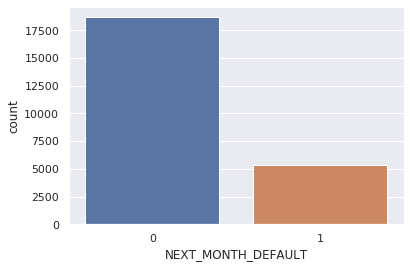

In [390]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="NEXT_MONTH_DEFAULT", data=Y.to_frame())

In [399]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)

### after sampling

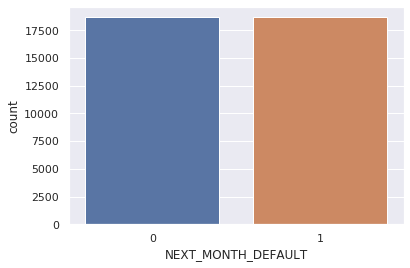

In [400]:
ax = sns.countplot(x="NEXT_MONTH_DEFAULT", data=y_resampled.to_frame())

###  split the training data to train set and test set

In [401]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2,random_state=42)

### we use RandomForestClassifier for our model. it is good for binary classfication

In [422]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=500,max_features='auto',random_state=0,
                          max_depth=10)
clf_RF.fit(x_train,y_train)

y_pred_RF=clf_RF.predict(x_test)
y_train_pred_RF = clf_RF.predict(x_train)

### XGBoost model

In [423]:
from xgboost import XGBClassifier
clf_XG=XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=400, 
                      reg_alpha = 0.3,
                      max_depth=12, 
                      gamma=10)
clf_XG.fit(x_train,y_train)

y_pred_XG=clf_XG.predict(x_test)
y_train_pred_XG = clf_XG.predict(x_train)


### this code is for testing purpose

In [412]:
# from sklearn.ensemble import RandomForestClassifier
# clf_test=XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.01,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic', 
#                       n_estimators=400, 
#                       reg_alpha = 0.3,
#                       max_depth=12, 
#                       gamma=10)
# clf_test.fit(X_resampled,y_resampled)

# y_pred_test=clf_test.predict(test)

In [413]:
# di_ct={'Client_ID':test1.Client_ID,'NEXT_MONTH_DEFAULT':y_pred_test}

# testdf=pd.DataFrame(di_ct)
# testdf.to_csv('file5.csv', header=True, index=False) 

### Accuracies

## Random Forest

In [424]:
from sklearn import metrics

print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.8452062131762186
test accuracy=  0.809587573647563


## XGBoost

In [425]:
from sklearn import metrics

print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_XG))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_XG))

train accuracy=  0.856621585431173
test accuracy=  0.8462774504552758


### confusion matrix

## Random Forest

In [426]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, y_pred_RF, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3820
           1       0.83      0.77      0.80      3648

    accuracy                           0.81      7468
   macro avg       0.81      0.81      0.81      7468
weighted avg       0.81      0.81      0.81      7468



In [428]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, y_pred_XG, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3820
           1       0.86      0.82      0.84      3648

    accuracy                           0.85      7468
   macro avg       0.85      0.85      0.85      7468
weighted avg       0.85      0.85      0.85      7468



## XGBoost

### Cross validation

In [429]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf_XG, X=x_train, y=y_train, cv=10)

print(all_accuracies)

[0.83467202 0.83701473 0.83997322 0.83327754 0.84131235 0.83796451
 0.8382993  0.84231671 0.82926013 0.84566455]


In [417]:
print(all_accuracies.mean())

0.8379755042937065


## Tunning the model
### we use GridSearchCV library for that

In [418]:
grid_param = {
    'n_estimators': [300,400,500,600,700,900],
    'max_depth':[6,7,8,9,10,12,13]
}

In [17]:
from sklearn.model_selection import GridSearchCV
gd_sr1 = GridSearchCV(estimator=clf_XG,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [41]:
# gd_sr1.fit(x_train, y_train)

## Feature importance

In [430]:
X.columns

Index(['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
       'DUE_AMT', 'PAY'],
      dtype='object')

In [433]:
a=['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
       'DUE_AMT', 'PAY']
feature_imp = pd.Series(clf_RF.feature_importances_,index=a).sort_values(ascending=False)
feature_imp

PAY                 0.260682
PAY_JULY            0.089009
PAY_AUG             0.075367
PAY_SEP             0.040687
Gender              0.038861
DUE_AMT             0.038261
PAID_AMT_JULY       0.037041
PAID_AMT_AUG        0.034463
PAY_OCT             0.032737
DUE_AMT_JULY        0.030351
AGE                 0.026628
PAID_AMT_SEP        0.026474
DUE_AMT_SEP         0.026187
DUE_AMT_AUG         0.025525
PAY_NOV             0.025266
PAY_DEC             0.023826
PAID_AMT_OCT        0.023114
DUE_AMT_OCT         0.021881
DUE_AMT_NOV         0.021000
PAID_AMT_NOV        0.019983
PAID_AMT_DEC        0.018991
DUE_AMT_DEC         0.016426
EDUCATION_STATUS    0.016286
MARITAL_STATUS      0.016141
Balance_Limit_V1    0.014812
dtype: float64

No handles with labels found to put in legend.


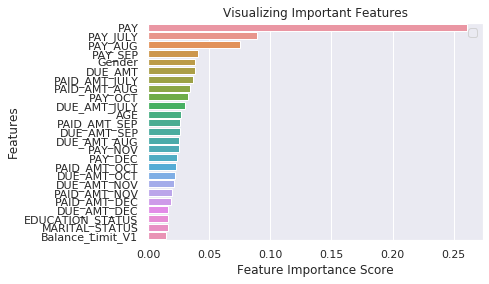

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### our new features performed well
### our feature engineering part is succeeded